# 数据探索性分析与数据预处理

刘逸凡 3220190847

本次作业中，将对 2 个数据集进行探索性分析与预处理。 

数据集wine-reviews

wine-reviews数据集本身保存为 csv 格式，关于酒评价信息的数据统计，根据数据集的属性解释得知该数据集 有10个属性，包含酒的名称、评价、度数、价格等信息。根据属性解释文件分析后可以得 出，数值属性包括：'points', 'price'；标称属性包括：'country', 'description', 'designation',
             'province', 'region_1', 'region_2', 'variety', 'winery'等8个属性

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from math import sqrt
from statsmodels.formula.api import ols
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标
# import statsmodels.api as sm
# 读取数据
df = pd.read_csv('C:/Users/74024/Documents/study/Going/DM/DM427/wine-reviews/winemag-data_first150k.csv')
# 数值属性
label_num = ['points', 'price']
label_nom = ['country', 'description', 'designation',
             'province', 'region_1', 'region_2', 'variety', 'winery']
df_num = df[label_num]#数值属性
df_nom = df[label_nom]#标称属性

## 数据摘要

### 标称属性：

In [14]:
# 数据摘要-----------
# 属性可能取值频数
def frequency(label):
    f = df[label].value_counts()
    f = pd.DataFrame(f)
    return f

标称属性的频数：因为标称属性过多，在报告中只列举部分标称属性的统计量,使用.value_counts() 函数列出该属性可能取值频数并显示。

In [13]:
# 标称属性频数输出
def OutNominal():
    for item in lable_nom:
        print("{}可能取值:\n{}".format(item, frequency(item)))
OutNominal()

country可能取值:
                        country
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                     

由频数发现，原产地在美国的酒占数量最大，而美国中加利福尼亚州出产的酒数量占多数

### 数值属性：

选取数值属性，分别使用.max(),.min(),.mean(),.median(),.quantile()等函数获取属性最大、最小、均值、中位数、四分位数。使用.isnull().sum()函数获取缺失值个数。

In [66]:
#数值属性5数概括
def Num5():
    for item in label_num:
        Minimum = df[item].min()
        Maximum = df[item].max()
        Q1 = df[item].quantile(0.25)
        Median = df[item].mean()
        Q3 = df[item].quantile(0.75)
        print("{}五数概括为：{}，{}，{}，{}，{}".format(item,Minimum,Q1,Median,Q3,Maximum))
#数值属性缺失值个数
def lostdata(nums,item):
     nulltotal = nums[item].isnull().sum()
     print("{}数据缺失值个数为：{}".format(item,nulltotal))
Num5()
for item in label_num :
    lostdata(df,item)

points五数概括为：80，86.0，87.8884184721394，90.0，100
price五数概括为：4.0，16.0，33.13148249353299，40.0，2300.0
points数据缺失值个数为：0
price数据缺失值个数为：13695


## 数据可视化：

导入matplotlib.pyplot模块，用于数据可视化。
使用hist(bins = XX)函数，绘制直方图。
使用boxplot()函数，绘制盒图

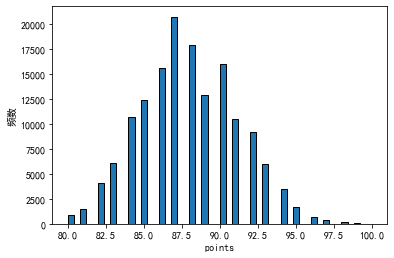

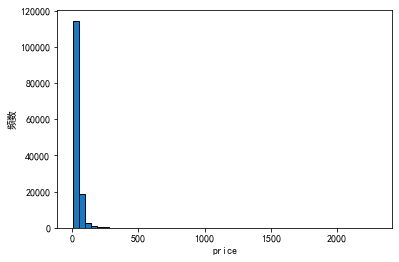

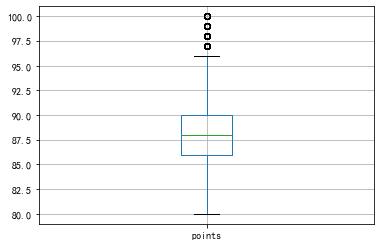

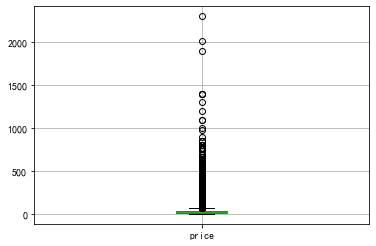

In [3]:
#数据可视化
#直方图
def plothist(nums,lable):
    nums=nums.dropna()
    plt.hist(x=nums,  # 指定绘图数据
             bins=50,# 指定直方图中条块的个数
             edgecolor = 'black') # 指定直方图的边框色
    plt.xlabel(lable)
    plt.ylabel('频数')
    plt.show()
#盒图
def Box(nums):
    l = pd.DataFrame(nums)
    l.boxplot()
    plt.show()
plothist(df['points'],'points')
plothist(df['price'],'price')
Box(df['points'])
Box(df['price'])

## 缺失值处理

由数据摘要中的缺失值个数得，数值属性有缺失值的只有'price'价格属性

### 对比图可视化

In [2]:
def doublenum(nums1,nums2):
    plt.figure(figsize=(30, 10))
    p1=plt.subplot(121)
    plt.sca(p1)
    nums1.hist(bins=500,edgecolor = 'black')
    plt.xlim((1, 200))
    p2=plt.subplot(122)
    p1.set_title("填补前",fontsize=18)
    plt.sca(p2)
    nums2.hist(bins=500,edgecolor = 'black')
    plt.xlim((1, 200))
    p2.set_title("填补后",fontsize=18)
    plt.show()

### 将缺失部分剔除

使用isnull().sum()函数统计数值属性缺失值数量，有针对性的分析其缺失的原因

In [65]:
def delMiss(nums,label):
    nums=nums.dropna()
    lostdata(nums,label)
delMiss(df,'price')

price数据缺失值个数为：0


### 用最高频率值来填补缺失值

使用mode()函数获取众数，使用fillna()函数填补缺失值，并用直方图可视化地对比新旧数据集

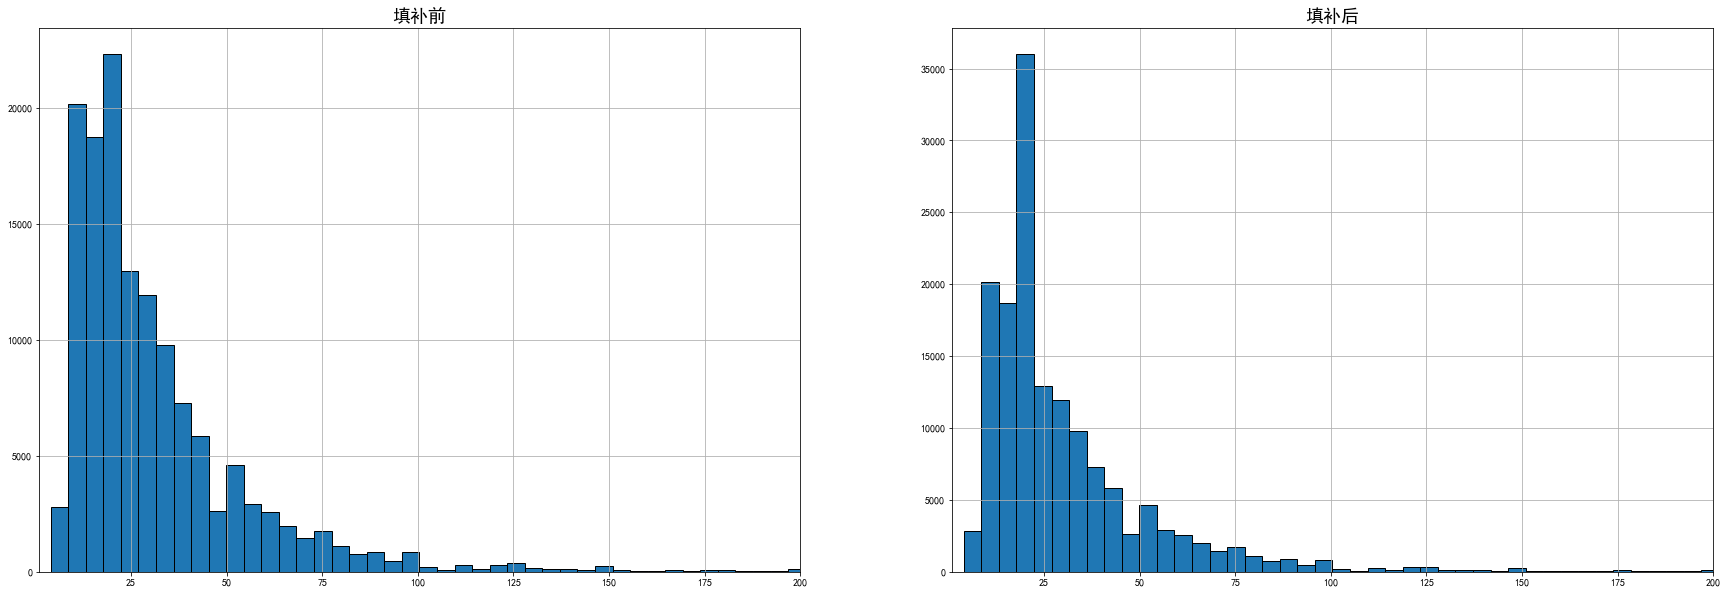

In [6]:
#用最高频率值来填补缺失值
def ModeFill(num):
    modefill=num.mode()
    modedata = modefill.iloc[0]  # 众数值提取
    numsf = num.fillna(modedata)  # 填充
    doublenum(num,numsf)
ModeFill(df['price'])

### 通过属性的相关关系来填补缺失值

首先计算属性之间的相关关系

In [68]:
def corrsp(nums):
    cs = nums.corr()
    print(cs)
    return
corrsp(df)

            Unnamed: 0    points     price
Unnamed: 0    1.000000 -0.094197 -0.036687
points       -0.094197  1.000000  0.459863
price        -0.036687  0.459863  1.000000


得出price和points之间的相关性是最高的

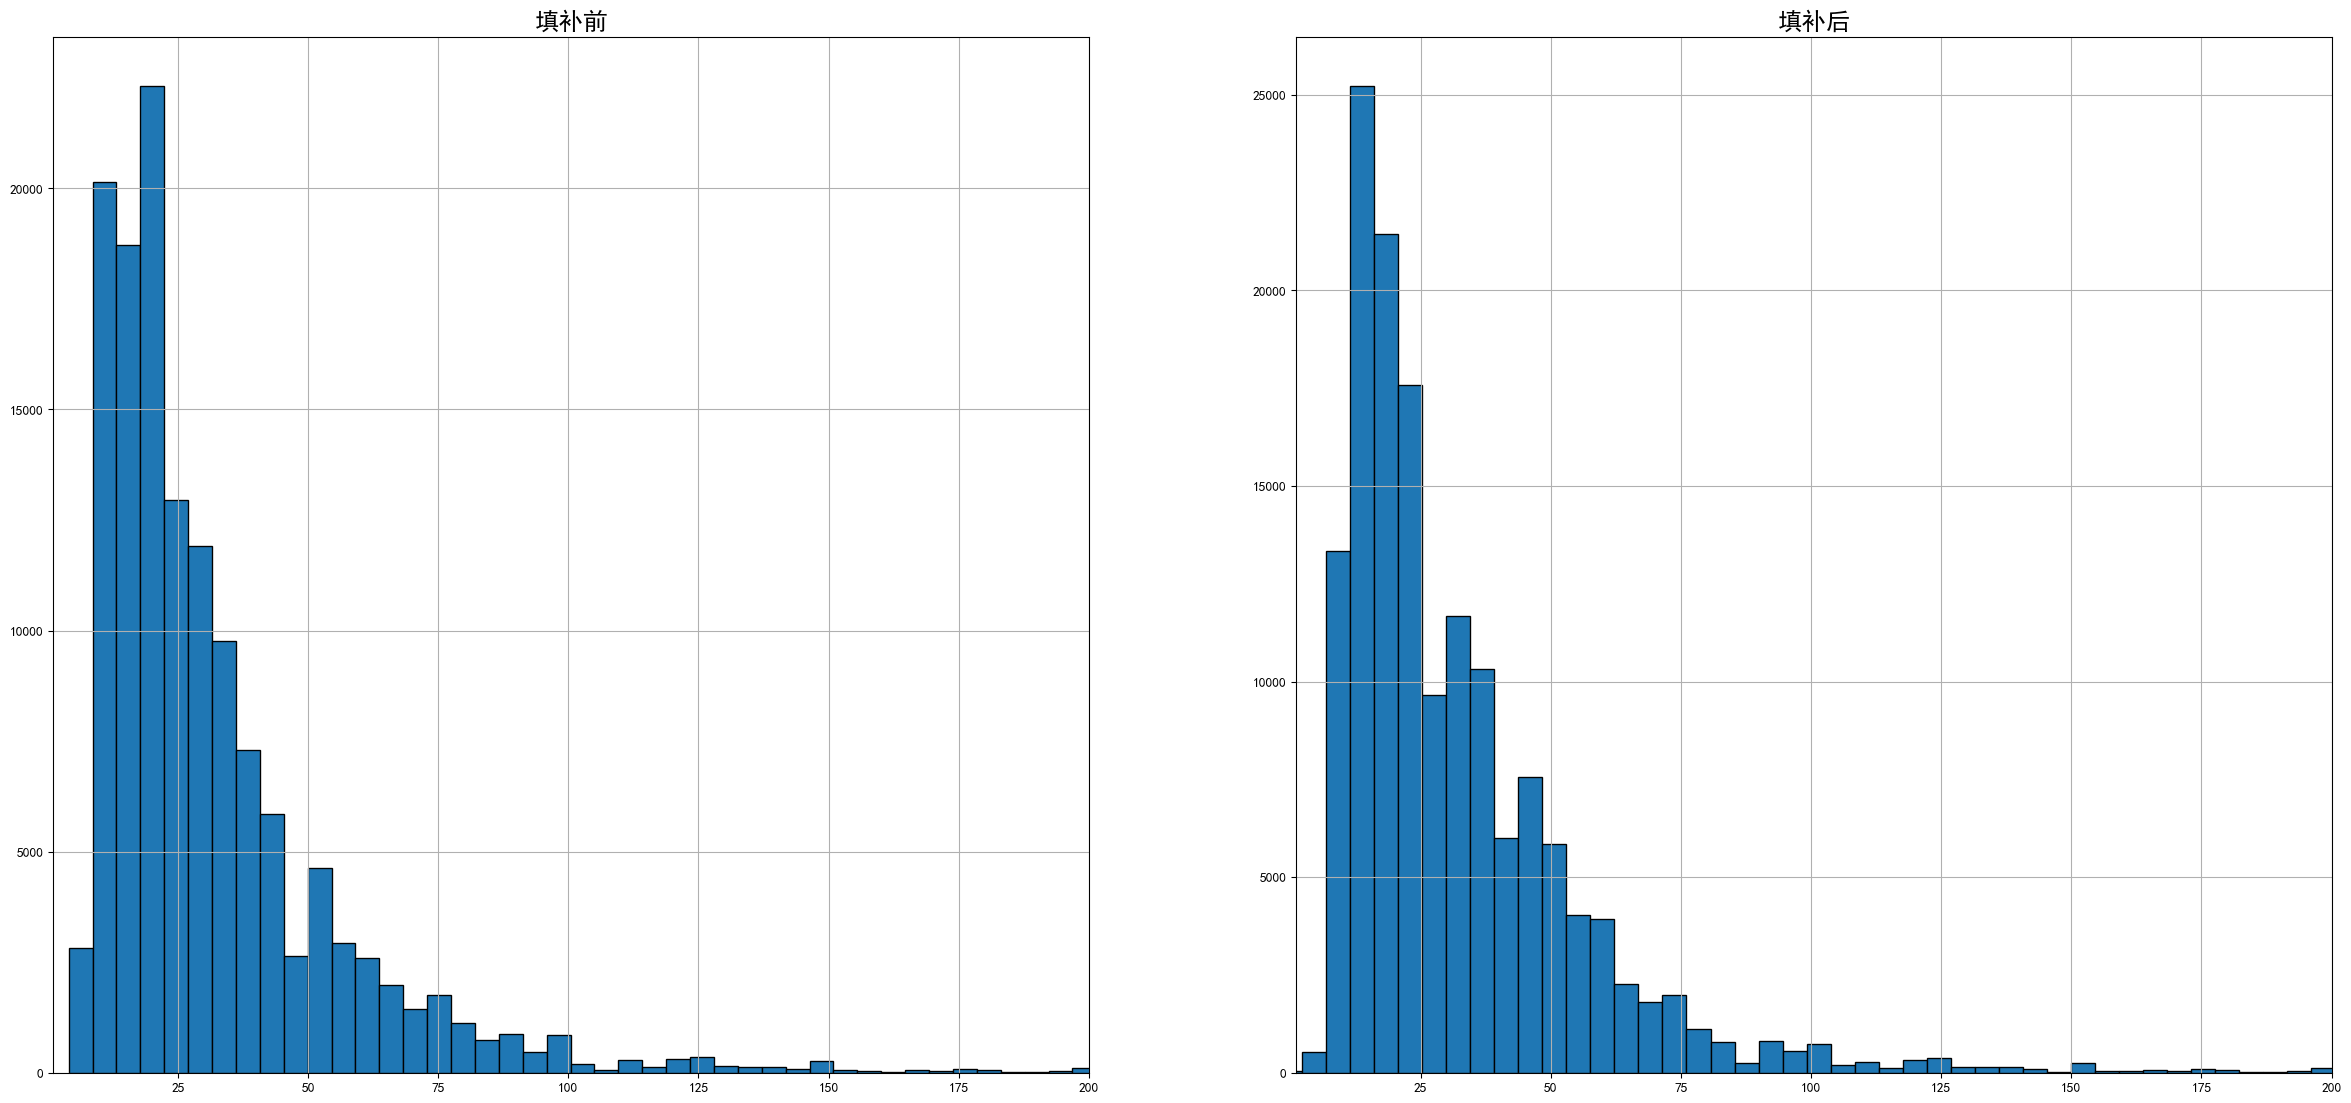

In [3]:
def corfill(nums):
    plt.figure(figsize=(30, 14), dpi=98)
    p1 = plt.subplot(1, 2, 1)
    p2 = plt.subplot(1, 2, 2)
    plt.sca(p1)
    nums['price'].hist(bins=500, edgecolor='black')
    plt.xlim((1, 200))
    p1.set_title("填补前", fontsize=18)
    wine_model = ols("price ~points",data=nums).fit()
    price_pred = wine_model.predict(nums['points'])
    for i in range(len(nums['price'])):
        if (np.isnan(nums['price'][i])):
            nums.loc[i, 'price']  = int(price_pred[i])
    plt.sca(p2)
    nums['price'].hist(bins=500, edgecolor='black')
    plt.xlim((1, 200))
    p2.set_title("填补后", fontsize=18)
    plt.show()
corfill(df)

### 通过属性相似性来填补缺失值

In [12]:
#通过属性相似性来填补缺失值
df_sim = df[['price','points']]
pp = {}
for row in df_sim.iterrows():
    if pp.get(row[1]['points'], None):
        if not np.isnan(row[1]['price']):
            pp[row[1]['points']][0] += row[1]['price']
            pp[row[1]['points']][1] += 1
    else:
        if not np.isnan(row[1]['price']):
            pp[row[1]['points']] = [row[1]['price'], 1]
for k in pp.keys():
    pp[k][0] = round(pp[k][0] / pp[k][1], 4)
for i in range(len(df_sim['price'])):
    if (np.isnan(df_sim['price'][i])):
        df_sim.loc[i, 'price']  = pp[df_sim.loc[i, 'points']][0]

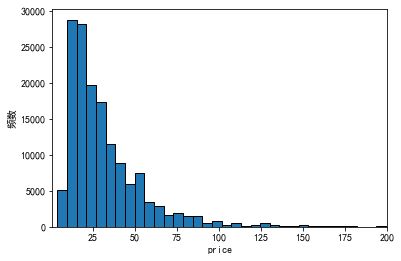

In [15]:
plt.hist(x=df_sim['price'],  # 指定绘图数据
             bins=400,# 指定直方图中条块的个数
             edgecolor = 'black') # 指定直方图的边框色
plt.xlabel('price')
plt.ylabel('频数')
plt.xlim((1, 200))
plt.show()